In [1]:

from src.config import Config
from src.data.big_query_loader import BigQueryLoader

assignment_activity = BigQueryLoader.load_data(
    query_file="assignment_activity.sql", parquet_file="assignment_activity"
)

DATA EXIST, IS LOADING FROM LOCAL ...


In [2]:
variation_size = assignment_activity.groupby("abtest_group")["assignment_date"].count()
group_A_size = int(variation_size["A"])
group_B_size = int(variation_size["B"])
total_exp_population = assignment_activity.shape[0]
group_B_ratio = group_B_size / total_exp_population
group_A_ratio = group_A_size / total_exp_population

print(group_A_size, group_B_size, total_exp_population)
print(f"GROUP B RATIO: {group_B_ratio}", f"GROUP A RATIO: {group_A_ratio}")

8265610 2065446 10331056
GROUP B RATIO: 0.19992593206347928 GROUP A RATIO: 0.8000740679365207


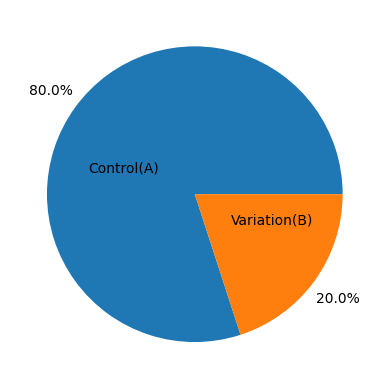

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plott = ax.pie(
    [group_A_size, group_B_size],
    labels=["Control(A)", "Variation(B)"],
    autopct="%1.1f%%",
    # colors=["saddlebrown", "gray"],
    pctdistance=1.2,
    labeldistance=0.3,
    # radius=0.5
)

In [4]:
from src.data.feature_extraction import get_groups_daily_assignment
group_assignment = get_groups_daily_assignment(assignment_activity)

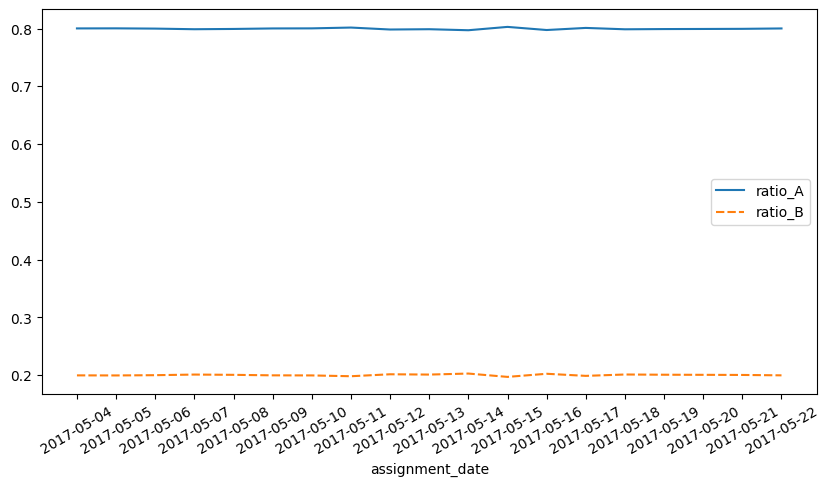

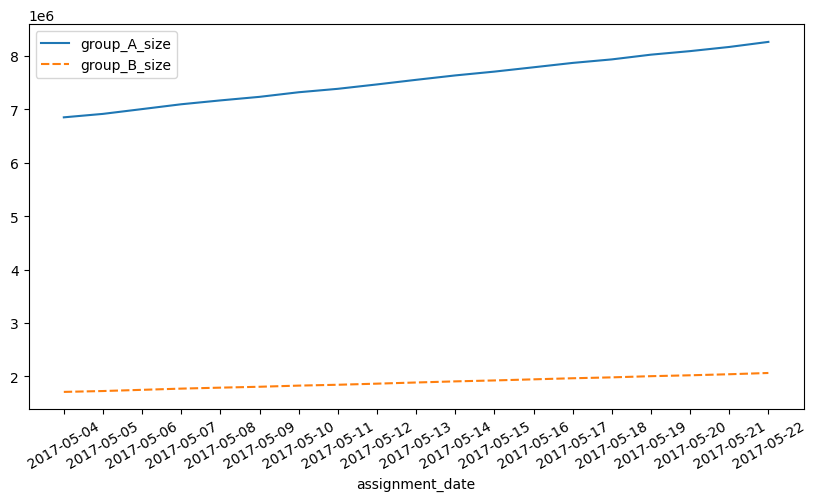

In [5]:
import seaborn as sns
plt.figure(figsize=(10, 5))
ax = sns.lineplot(group_assignment.set_index("assignment_date")[["ratio_A", "ratio_B"]])
a = plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    group_assignment.set_index("assignment_date")[["group_A_size", "group_B_size"]]
)
a = plt.xticks(rotation=30)
plt.show()